## High Level Computer Vision 
### Exercise 3: Convolutional Neural Networks

**You may wirte your report in this `ipynb` file or submit the report as a PDF file.**

In [ ]:
Name = "Luisa Danalachi"
Matriculation_Number = "7022909"

Name = "Victor Martinez Palomares"
Matriculation_Number = "7021729"

Name = "Soham Roy"
Matriculation_Number = "7028704"

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In Exercise 3, you will implement a convolutional neural network to perform image classification and explore methods to improve the training performance and generalization of these networks.
We will use the CIFAR-10 dataset as a benchmark for our networks, similar to the previous exercise. This dataset consists of 50000 training images of 32x32 resolution with 10 object classes, namely airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. The task is to implement a convolutional network to classify these images using the PyTorch library. The four questions are,

- Implementing a convolutional neural network, training it, and visualizing its weights(Question 1).
- Experiment with batch normalization and early stopping (Question 2).
- Data augmentation and dropout to improve generalization (Question 3).
- Implement transfer learning from an ImageNet-pretrained model (Question 4).

### Question 1: Implement Convolutional Network (10 points)

In this question, we will implement a five-layered convolutional neural network architecture as well as the loss function to train it. Refer to the comments in the code to the exact places where you need to fill in the code.

<img src="./resources/fig1.png" width="700" align=left>

a) Our architecture is shown in Fig 1. It has five convolution blocks. Each block is consist of convolution, max pooling, and ReLU operation in that order. We will use 3×3 kernels in all convolutional layers. Set the padding and stride of the convolutional layers so that they maintain the spatial dimensions. Max pooling operations are done with 2×2 kernels, with a stride of 2, thereby halving the spatial resolution each time. Finally, five stacking these five blocks leads to a 512 × 1 × 1 feature map. Classification is achieved by a fully connected layer. We will train convolutional neural networks on the CIFAR-10 dataset. Implement a class ConvNet to define the model described. The ConvNet takes 32 × 32 color images as inputs and has 5 hidden layers with 128, 512, 512, 512, 512 filters, and produces a 10-class classification. The code to train the model is already provided. Train the above model and report the training and validation accuracies. (5 points)

b) Implement a function `PrintModelSize`, which calculates and prints the number of parameters of a neural network. `PrintModelSize` takes a model as input and returns the parameters of a model. This gives us a measure of model capacity. Report the number of parameters for the described model. (2 points)

<img src="./resources/fig2.png" width="600" align=left>

c) Implement a function `VisualizeFilter`, which visualizes the filters of the first convolution layer implemented in Q1.a. In other words, you need to show 128 filters with size 3x3 as color images (since each filter has three input channels). Stack these into 3x3 color images into one large image. You can use the `imshow` function from the `matplotlib` library to visualize the weights. See an example in Fig. 2 Compare the filters before and after training. Do you see any patterns? (3 points)

#### Wirte your report for Q1 in this cell.
##### **Q1.a)**
After training the model once for 20 epochs. We get the following accuracies:

Train accuracy is: 98.1 %

Validataion accuracy is: 79.3 %

*Find the output of the training and the plots with training and validation accuracy and loss history in the zip file under q1 folder.

##### **Q1.b)**
The described model has a total number of parameters: **7678474**
##### **Q1.c)**
After training the model, the weights in the first conv layer show some color patterns compared to complete random colors in the untrained weights. This means that training the model makes the first conv layer to start finding some color and contrast border patterns.

*Find the pictures of the model before and after training in the zip file under q1 folder.

### Question 2: Improve training of Convolutional Networks (10 points)

a) Batch normalization is a widely used operation in neural networks, which will increase the speed of convergence and reach higher performance. Read the paper “Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift” for more theoretical details.
In practice, these operations are implemented in the most popular toolbox, such as PyTorch and TensorFlow. Add batch normalization in the model of Q1.a. Please keep other hyperparameters the same, but only add batch normalization. The ConvNet with batch normalization still uses the same class with Q1.a but different arguments. Check the code for details. In each block, the computations are in the order of convolution, batch normalization, pooling, and ReLU. Compare the loss curves and accuracy using batch normalization to its counterpart in Q1.a. (5 points)

b) Early stopping is a method to alleviate overfitting. Instead of reporting the performance of the final model, early stopping also saves the best model on the validation set during training. Increase the training epochs to 50 in Q1.a and Q2.a, and compare the best model and latest model on the training set. Due to the randomness, you can train multiple times to verify and observe overfitting and early stopping. (5 points)

#### Wirte your report for Q2 in this cell.
##### **Q2.a)**
After training the model once for 20 epochs. We get the following accuracies:

Train accuracy is: 97.9 %

Validataion accuracy is: 81.2 %

We can observe that the validation accuracy is a bit higher, but nothing that could be consider significant. 

Comparing the loss plots of Q1a and Q2a we see how Q2a thanks to batch normalization was getting a bit higher accuracies and lower loss at the same Epoch.

*Find the output of the training and the plots with training and validation accuracy and loss history in the zip file under q2 folder.

##### **Q2.b)**

First of all we see than in Q1.a (without batch normalization) the best validation accuracy of **80.9%** was achieved in **Epoch 24**. For Q2.a (with batch normalization) the best validation accuracy was of **84.8%** at **Epoch 47**.

As we see in the outputs, specially in Q1.a where we don't use batch normalization, the model is converging and the later epochs do not increase the validation accuracy, altought, as we see in the plots, it does not decrease significantly either.

Observing the plots, we cannot claim that the validation accuracy gets worse but the loss indeed does. 

There is not a lot of suffer of overfitting noticiable in this case. It could be due to the similarity between the training and validation data. Getting the accuracy for test data could show us more information. But appart from avoiding overfitting, early stopping would be good choice to save time and computation expenses, since in both models (Q1.a in particular) later epochs did not made the model any better.

*Find the output of the training of both models and the plots with training and validation accuracy and loss history in the zip file under q2 folder.



### Question 3: Improve generalization of Convolutional Networks (10 points)

We saw in Q2 that the model can start over-fitting to the training set if we continue training for long. To prevent over-fitting, there are two main paradigms we can focus on. The first is to get more training data. This might be a difficult and expensive process involving significant. However, it is generally the most effective way to learn more general models. A cheaper alternative is to perform data augmentation. The second approach is to regularize the model. In the following sub-questions, we will experiment with each of these paradigms and measure the effect on the model generalization.

a) Data augmentation is the process of creating more training data by applying certain transformations to the training set images. Usually, the underlying assumption is that the label of the image does not change under the applied transformations. This includes geometric transformations like translation, rotation, scaling, flipping, random cropping, and color transformations like greyscale, colorjitter. For every image in the training batch, a random transformation is sampled from the possible ones (e.g., a random number of pixels to translate the image by) and is applied to the image. While designing the data input pipeline, we must choose the hyper-parameters for these transformations (e.g., limits of translation or rotation) based on things we expect to see in the test-set/real world. Your task in this question is to implement the data augmentation for the CIFAR-10 classification task. Many of these transformations are implemented in the `torchvision.transforms` package. Familiarize your- self with the APIs of these transforms, and functions to compose multiple transforms or randomly sample them. Next, implement geometric and color space data augmentations for the CIFAR-10 dataset, by choos- ing the right functions and order of application. Tune the hyper-parameters of these data augmentations to improve the validation performance. You will need to train the model a bit longer (20-30 epochs) with data augmentation, as the training data is effectively larger now. Discuss which augmentations work well for you in the report. (6 points)

b) Dropout is a popular scheme to regularize the model to improve generalization. The dropout layer works by setting the input activations randomly to zero at the output. You can implement Dropout by adding the `torch.nn.Dropout` layer between the conv blocks in your model. The layer has a single hyper-parameter $p$, which is the probability of dropping the input activations. High values of $p$ regularize the model heavily and decrease model capacity, but with low values, the model might overfit. Find the right hyper-parameter for $p$ by training the model for different values of $p$ and comparing training validation and validation accuracies. You can use the same parameter $p$ for all layers. You can also disable the data augmentation from the previous step while running this experiment, to clearly see the benefit of dropout. Show the plot of training and validation accuracies for different values of dropout (0.1 - 0.9) in the report. (4 points)

#### Wirte your report for Q3 in this cell.
##### **Q3.a)**

All the runs with the results and plots are in the folder q3a.
We trained the models for 30 epochs and tried different augmentation combinations. 

Our approach was to try a combination of data augmentations: 
1. 
Geometric: 
 
    transforms.RandomRotation([-90, 90]) 

    transforms.RandomHorizontalFlip()  

    transforms.RandomAffine(0, translate=(0.4, 0.5)) 

Color:

    transforms.ColorJitter(brightness = 0.2, hue = 0.2, saturation = 0.2)

First trained a model with RandomRotation, then RandomRotation + RandomHorizontalFlip and so on. You can see the result of all training in the folder q3a, all_tests.out. Based on the results, we noticed that transforms.RandomAffine(0, translate=(0.4, 0.5)) is an impediment to the models performance, which significantly reduces the accuracy. Therefore, we chose to train again models with different data augmentations without RandomAffine. From the last run with all combinations, file all_test_without_affine.out, we have the best accuracy only on the data augmentation with RandomRotation, 77.0 %.

We also tried other combinations suchs as:
2.  
    RandomHorizontalFlip(p=0.5)

    ColorJitter(brightness=[0.0, 3.0], contrast=None, saturation=None, hue=None)

on which we achieved a validation accuracy of 78.9 %. The training result can be seen in folder q3a, file "test1.out" and the plot picture is test1_val_train_acc.PNG. 

3. 

    RandomHorizontalFlip(p=0.5),

    RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0), 

    ColorJitter(brightness=[0.8, 1.2], contrast=None, saturation=[0.8, 1.2], hue=[-0.2, 0.2])]

on which we achieved a validation accuracy of 76.5 %. The training result can be seen in folder q3a, file "test2.out" and the plot picture is test2_val_train_acc.PNG.     

4. We also tried a combination of two: Geometric + Color. 

    transforms.RandomRotation([-90, 90])

    transforms.RandomHorizontalFlip()

    transforms.ColorJitter(brightness = 0.2)

    transforms.ColorJitter(hue = 0.2)

    transforms.ColorJitter(saturation = 0.2)

You can find the results of all test in file test_geo_color.out and its corresponding plots in folder test_geo_color. In this experiment we trained models with every combination of geometric and color data augmentation. You can see the results in test_geo_color.out. Based on it the best val accuracy is  86.8 % using data augmentation type:

    RandomHorizontalFlip(p=0.5)

    ColorJitter(brightness=None, contrast=None, saturation=[0.8, 1.2], hue=None)


We performed finetuning for this combination. We tried different hyperparameters, for RandomHorizontalFlip, the value p  from 0.1 to 1.1 with a step 0.1, and for Saturation from 0.2 to 2.0 with step 0.2. After training all models we have the best val accuracy 86.6 % for 30 epochs on the hyperparameter combination of :

    p = 0.3
    saturation = 0.4
    
The final accuracy obtained for training the model for 50 epochs using these hyperparameters: 87.0 % (epoch 48).


5.  In addition to this we did a study the impact of data augmentations of the training and validation accuracy of the model. The augmentations has been performed on the geometric space using the torch.transforms function Random affine and in the colour space using the function ColourJitter. On a deeper level we wanted to study the impact of each of the parameters of these two functions on the model performance. The impact of one parameter of each function is monitored by changing its values and keeping track of the result while keeping other parameters constant. 

Random Affine has the parameters Degrees of rotation, Translation and Scale

a.For "degree"
Here we performed six experiments with degree values 0-30, 30-60,60-90,90-120 , 120-150 and 150-180

\begin{array}{|c|c|c|c|}
    \hline
       Sr.no & parameter value & trainAcc & valAcc\\\hline
       1&0,30 & 72.0 & 69.1\\\hline
       2&30,60 & 73.18 &  70.1\\\hline
       3&60,90 & 71.88 &  70.4\\\hline
       4&90,120 &  71.76 &  68.8\\\hline
       5&120,150 &  73.57 &  70.0\\\hline
       6&150,180 &  72.33 &  68.9\\\hline
\end{array}


Observation :- The degree of rotation has little effect on the model performance while the mean of training accuracy is around 72 and variance of 0.8, while that of the validation accuracy is 69.3 and 0.66 respectively.
  
b. For "translation"

Here we performed three experiments with translation  values 0.1-0.3, 0.3-0.5,0.5-0.7 respectively

\begin{array}{|c|c|c|c|}
    \hline
       Sr.no & parameter value & trainAcc & valAcc\\\hline
       1&0.1,0.3 & 71.88 & 70.04\\\hline
       2&0.3,0.5 & 66.45 &  64.2\\\hline
       3&0.5,0.7 & 52.19 &  52.0\\\hline
\end{array}


Observation :-From the above results it is evident that the translation factor has a big impact on the model performance with increasing values leading to a degraded performance. The training and validation accuracy has a variance of 97 and 84 respectively. The best results are obtained with the translation values in range less than 0.3.

c. For "scale"

Here we performed four experiments with scale  values 0.1-0.3, 0.3-0.5,0.5-0.7 respectively

\begin{array}{|c|c|c|c|}
    \hline
       Sr.no & parameter value & trainAcc & valAcc\\\hline
       1&0.1,0.3 & 38.89 & 34.7\\\hline
       2&0.3,0.5 & 59.62 &  56.8\\\hline
       3&0.5,0.7 & 72.14 &  67.8\\\hline
       4&0.7,0.9 & 77.56 &  74.4\\\hline
\end{array}


Observation :- From the above results it is evident that the scale factor has a big impact on the model performance with increasing values leading to a better performance. Also for lower value there is a fluctuation of loss and accuracy scores with the epochs which gets more consistent with increasing scale values.  The training and validation accuracy has a variance of 303 and 305 respectively. The best results are obtained with the translation values above 0.7 .

ColourJitter –  For each of colourjitter parameters namely , Brightness, Contrast, saturation and hue , we are testing two models each for one higher and lower value to get an idea of the value of the parameters that best approximates to the data

\begin{array}{|c|c|c|c|}
    \hline
       Sr.no & parameter name&parameter value & trainAcc & valAcc\\\hline
       1& brightness&None & 79.76 & 76.6\\\hline
       2&brightness &0.7& 71.08 &  67.9\\\hline
       3&contrast & 0.2 & 73.01 &  68.2\\\hline
       4&contrast &0.8& 68.32 &  66.2\\\hline
       5&saturation &0.1& 73.48 &  72.3\\\hline
       6&saturation &0.9& 72.08 &  69.6\\\hline
       7&hue &0.1& 75.52 &  73.5\\\hline
       8&hue &0.5& 73.02 &  70.08\\\hline
\end{array}


Observation :- Lower value of Brightness parameter yields a better performance score.Lower contract leads to a better validation accuracy score but also results in more overfitting compared to a model with higher contrast value.Extremities of Saturation does not seem to be a big impact on the model performance, though lower values seems to be slightly better than higher counterparts.Lower value of hue gives a slightly improved model performance but does not a big impact on the scores.

Deriving an intuition from these experiemnts here and from the ones reported above the final accuracy obtained for training the model for 50 epochs using these hyperparameters: 87.0 % (epoch 48).


##### **Q3.b)**
\begin{array}{|c|c|c|c|}
    \hline
       rate & trainAcc & valAcc\\\hline
       0.1 & 87.9 & 82.0\\\hline
       0.2 & 83.7 &  84.1\\\hline
       0.3 & 80.2 &  82.2\\\hline
       0.4 &  74.7 &  81.2\\\hline
       0.5 &  69.2 &  74.7\\\hline
       0.6 &  59.1 &  61.7\\\hline
       0.7 &  53.7 &  55.5\\\hline
       0.8 &  46.3 &  46.8\\\hline
       0.9 &  21.2 &  10.2\\\hline
\end{array}

In the table above and in the attached plots we observe that lower dropout rates yield better validation accuracies.

Despite the fact that the training accuracy is lower in **[0.2, 0.3]** than **0.1** they achieve better validation accuracy. This is due to better generalization thanks to the dropout mechanism. Thanks to this, it overfits less to the training data and yields better validation accuracies.

However, increasing the dropout rate from 0.4 up to 0.9 is not diminishing just training accuracy but also validation's. The capacity of the model is decreased. Many of the weights are dropped and the model is unable to learn the data. The maximum extend that we observe is drop out rate of **0.9** where the validation accuracy yields similar values to the random classifier.

*Find the output of the training of models and the plots with training and validation accuracy for all dropout rates in the zip file under q3 folder.

In [ ]:
def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512]
num_epochs = 20
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
norm_layer = None
print(hidden_size)


#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
#################################################################################
# TODO: Q3.a Chose the right data augmentation transforms with the right        #
# hyper-parameters and put them in the data_aug_transforms variable             #
#################################################################################
data_aug_transforms = []
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=False)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=test_transform
                                          )
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Using device: cuda
[128, 512, 512, 512, 512]


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting datasets/cifar-10-python.tar.gz to datasets/


In [ ]:
#-------------------------------------------------
# Convolutional neural network (Q1.a and Q2.a)
# Set norm_layer for different networks whether using batch normalization
#-------------------------------------------------
class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, norm_layer=None):
        super(ConvNet, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the convolutional layer    #
        # described in the exercise.                                                    #
        # For Q1.a make use of conv2d and relu layers from the torch.nn module.         #
        # For Q2.a make use of BatchNorm2d layer from the torch.nn module.              #
        # For Q3.b Use Dropout layer from the torch.nn module.                          #
        #################################################################################
        
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        layers.append(nn.Conv2d(in_channels = input_size,
                                out_channels = hidden_layers[0], 
                                kernel_size = 3,
                                padding = 1)) # add p = 1 for k = 3 because: h - k + 2p + 1 = h - 3 + 2 + 1 = h
        
        # add batchnorm if norm_layer is not None
        if norm_layer:
            layers.append(nn.BatchNorm2d(hidden_layers[0]))
            
        layers.append(nn.MaxPool2d(stride= 2, kernel_size = 2))
        layers.append(nn.ReLU())
        
      
        for layer in range(len(hidden_layers) - 1):
            layers.append(nn.Conv2d(in_channels = hidden_layers[layer],
                                    out_channels = hidden_layers[layer + 1],
                                    kernel_size = 3,
                                    padding = 1))
            # Q2.a
            if norm_layer:
                layers.append(nn.BatchNorm2d(hidden_layers[layer + 1]))
            layers.append(nn.MaxPool2d(stride= 2, kernel_size = 2))
            layers.append(nn.ReLU())

        layers.append(nn.Flatten())
        layers.append(nn.Linear(hidden_layers[-1], num_classes))
        
        self.layers = nn.Sequential(*layers)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        out = self.layers(x)
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [ ]:
#-------------------------------------------------
# Calculate the model size (Q1.b)
# if disp is true, print the model parameters, otherwise, only return the number of parameters.
#-------------------------------------------------
def PrintModelSize(model, disp=True):
    #################################################################################
    # TODO: Implement the function to count the number of trainable parameters in   #
    # the input model. This useful to track the capacity of the model you are       #
    # training                                                                      #
    #################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    model_sz = 0
    for params in model.parameters():
        if disp:
            print(params)
        model_sz += params.numel()

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return model_sz

In [ ]:
#-------------------------------------------------
# Calculate the model size (Q1.c)
# visualize the convolution filters of the first convolution layer of the input model
#-------------------------------------------------
def VisualizeFilter(model):
    #################################################################################
    # TODO: Implement the functiont to visualize the weights in the first conv layer#
    # in the model. Visualize them as a single image fo stacked filters.            #
    # You can use matlplotlib.imshow to visualize an image in python                #
    #################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    # ***** Source of inspiration: https://discuss.pytorch.org/t/visualize-feature-map/29597/2 
    
    # take the weights of first conv layer
    weight_conv1 = model.layers[0].weight

    # normalize
    w_min, w_max = weight_conv1.min(), weight_conv1.max()
    weight_conv1 = (weight_conv1 - w_min) / (w_max - w_min)

    grid_image_weights = torchvision.utils.make_grid(weight_conv1.detach().cpu())
    
    plt.figure(figsize=(15, 15))
    # move channel dim at the end for matplotlib
    plt.imshow(grid_image_weights.permute(2, 1, 0))
    plt.show()
    
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [ ]:
#======================================================================================
# Q1.a: Implementing convolutional neural net in PyTorch
#======================================================================================
# In this question we will implement a convolutional neural networks using the PyTorch
# library.  Please complete the code for the ConvNet class evaluating the model
#--------------------------------------------------------------------------------------
model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)
# Q2.a - Initialize the model with correct batch norm layer

model.apply(weights_init)
# Print the model
print(model)

ConvNet(
  (layers): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU()
    (9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU()
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=512, ou

In [ ]:
# Print model size
#======================================================================================
# Q1.b: Implementing the function to count the number of trainable parameters in the model
#======================================================================================
PrintModelSize(model, disp=False)

7678474

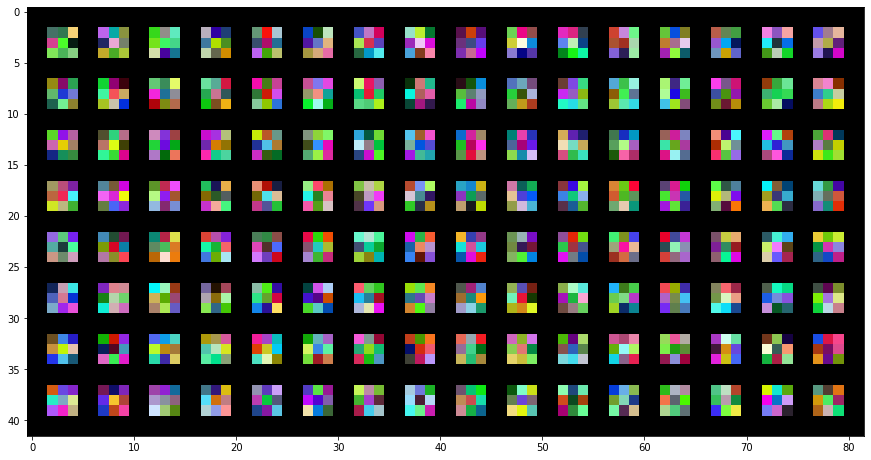

In [ ]:
#======================================================================================
# Q1.c: Implementing the function to visualize the filters in the first conv layers.
# Visualize the filters before training
#======================================================================================
VisualizeFilter(model)

# Q1 training

ConvNet(
  (layers): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU()
    (9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU()
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=512, ou

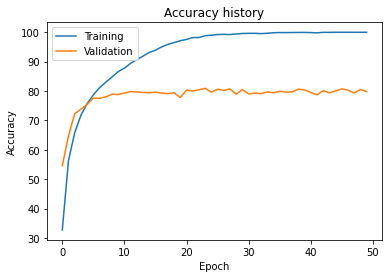

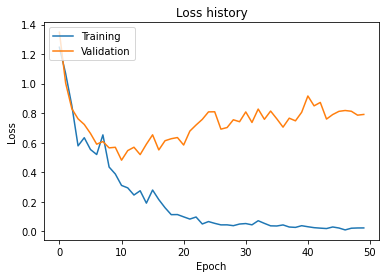

In [ ]:
#======================================================================================
# Q1.a: Implementing convolutional neural net in PyTorch
#======================================================================================
# In this question we will implement a convolutional neural networks using the PyTorch
# library.  Please complete the code for the ConvNet class evaluating the model
#--------------------------------------------------------------------------------------

# num_epochs = 20
# Q2b
num_epochs = 50

model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)

model.apply(weights_init)
# Print the model
print(model)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)

# store best model and acc
best_model = None
best_val_acc = 0.

loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    correct = 0
    total = 0 
    
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        # set the model to train
        model.train()
        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)    
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Train accuracy is: {} %'.format(100 * correct / total))
    train_acc_history.append(100 * correct / total)
    loss_history.append(loss.item())
    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        val_accuracy = 100 * correct / total
        print('Validataion accuracy is: {} %'.format(val_accuracy))
        val_acc_history.append(val_accuracy)
        val_loss_history.append(loss.item())
        #################################################################################
        # TODO: Q2.b Implement the early stopping mechanism to save the model which has #
        # acheieved the best validation accuracy so-far.                                #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_model = model
            print("New best validation accuracy: {} %".format(best_val_acc))
            # save model with best accuracy
            torch.save(best_model.state_dict(), 'bestmodel_q1.ckpt')
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    model.train()

    
# plot the accuracy history
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy history')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# plot the loss history
plt.plot(loss_history)
plt.plot(val_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss history')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

Accuracy of the network on the 1000 test images: 78.9 %


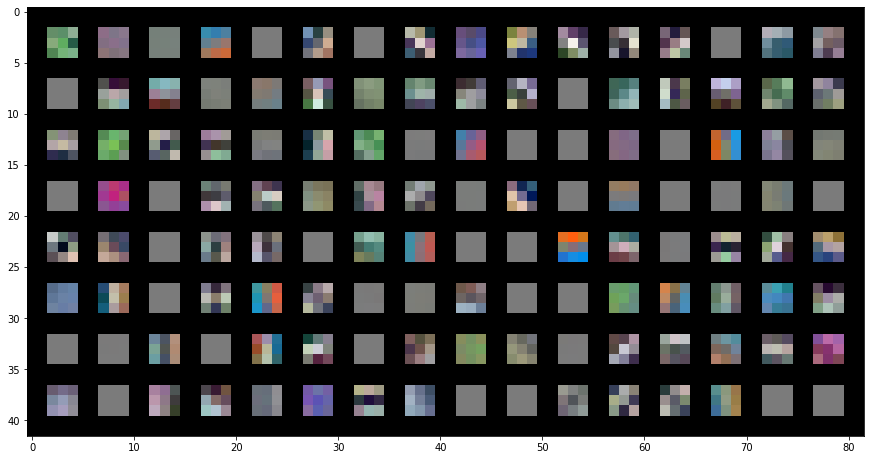

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
model.eval()
#################################################################################
# TODO: Q2.b Implement the early stopping mechanism to load the weights from the#
# best model so far and perform testing with this model.                        #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
checkpoint = torch.load('bestmodel_q1.ckpt')
model.load_state_dict(checkpoint)
model.eval()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

# Q1.c: Implementing the function to visualize the filters in the first conv layers.
# Visualize the filters before training
VisualizeFilter(model)
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

# Q2 training

ConvNet(
  (layers): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): ReLU()
    (8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

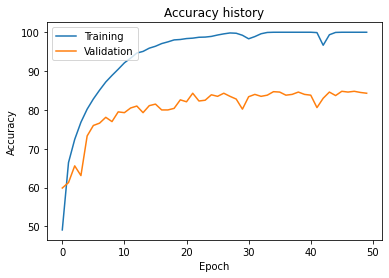

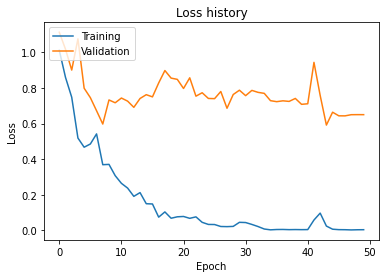

In [ ]:
#======================================================================================
# Q2.a - Initialize the model with correct batch norm layer
#======================================================================================
# In this question we will implement a convolutional neural networks using the PyTorch
# library.  Please complete the code for the ConvNet class evaluating the model
#--------------------------------------------------------------------------------------

# num_epochs = 20
# Q2b
num_epochs = 50

model = ConvNet(input_size, hidden_size, num_classes, norm_layer=True).to(device)

model.apply(weights_init)
# Print the model
print(model)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)

# store best model and acc
best_model = None
best_val_acc = 0.

loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    correct = 0
    total = 0 
    
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        # set the model to train
        model.train()
        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)    
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Train accuracy is: {} %'.format(100 * correct / total))
    train_acc_history.append(100 * correct / total)
    loss_history.append(loss.item())
    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        val_accuracy = 100 * correct / total
        print('Validataion accuracy is: {} %'.format(val_accuracy))
        val_acc_history.append(val_accuracy)
        val_loss_history.append(loss.item())
        #################################################################################
        # TODO: Q2.b Implement the early stopping mechanism to save the model which has #
        # acheieved the best validation accuracy so-far.                                #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_model = model
            print("New best validation accuracy: {} %".format(best_val_acc))
            # save model with best accuracy
            torch.save(best_model.state_dict(), 'bestmodel_q2.ckpt')
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    model.train()

    
# plot the accuracy history
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy history')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# plot the loss history
plt.plot(loss_history)
plt.plot(val_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss history')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Q3b Training

In [ ]:
#-------------------------------------------------
# Convolutional neural network (Q3.b)
# Set norm_layer for different networks whether using batch normalization
# Added dropout rate parameter
#-------------------------------------------------
class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, norm_layer=True, dropout_rate=None):
        super(ConvNet, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the convolutional layer    #
        # described in the exercise.                                                    #
        # For Q1.a make use of conv2d and relu layers from the torch.nn module.         #
        # For Q2.a make use of BatchNorm2d layer from the torch.nn module.              #
        # For Q3.b Use Dropout layer from the torch.nn module.                          #
        #################################################################################
        
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        layers.append(nn.Conv2d(in_channels = input_size,
                                out_channels = hidden_layers[0], 
                                kernel_size = 3,
                                padding = 1)) # add p = 1 for k = 3 because: h - k + 2p + 1 = h - 3 + 2 + 1 = h
        
        # add batchnorm if norm_layer is not None
        if norm_layer:
            layers.append(nn.BatchNorm2d(hidden_layers[0]))
            
        layers.append(nn.MaxPool2d(stride= 2, kernel_size = 2))
        layers.append(nn.ReLU())
        
        # Q3.a
        if dropout_rate:
            layers.append(nn.Dropout(p = dropout_rate))
        
        for layer in range(len(hidden_layers) - 1):
            layers.append(nn.Conv2d(in_channels = hidden_layers[layer],
                                    out_channels = hidden_layers[layer + 1],
                                    kernel_size = 3,
                                    padding = 1))
            # Q2.a
            if norm_layer:
                layers.append(nn.BatchNorm2d(hidden_layers[layer + 1]))
            layers.append(nn.MaxPool2d(stride= 2, kernel_size = 2))
            layers.append(nn.ReLU())
            # Q3.a
            if dropout_rate:
                layers.append(nn.Dropout(p = dropout_rate))

        layers.append(nn.Flatten())
        layers.append(nn.Linear(hidden_layers[-1], num_classes))
        
        self.layers = nn.Sequential(*layers)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        out = self.layers(x)
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [ ]:
#======================================================================================
# Q3.b: Implementing convolutional neural net in PyTorch
#======================================================================================
# In this question we will implement a convolutional neural networks using the PyTorch
# library.  Please complete the code for the ConvNet class evaluating the model
#--------------------------------------------------------------------------------------
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

train_acc_histories = []
val_acc_histories = []

for dropout_rate in dropout_rates:
  num_epochs = 20
  # Q2b
  # num_epochs = 50

  model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer, dropout_rate=dropout_rate).to(device)

  model.apply(weights_init)
  # Print the model
  print(model)

  # Loss and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

  # Train the model
  lr = learning_rate
  total_step = len(train_loader)

  loss_history = []
  val_loss_history = []
  train_acc_history = []
  val_acc_history = []

  for epoch in range(num_epochs):
      correct = 0
      total = 0 
      
      for i, (images, labels) in enumerate(train_loader):
          # Move tensors to the configured device
          images = images.to(device)
          labels = labels.to(device)
          # set the model to train
          model.train()
          # Forward pass
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)    
          loss = criterion(outputs, labels)
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          if (i+1) % 100 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
      print('Train accuracy is: {} %'.format(100 * correct / total))
      train_acc_history.append(100 * correct / total)
      loss_history.append(loss.item())
      # Code to update the lr
      lr *= learning_rate_decay
      update_lr(optimizer, lr)
      model.eval()
      with torch.no_grad():
          correct = 0
          total = 0
          for images, labels in val_loader:
              images = images.to(device)
              labels = labels.to(device)
              outputs = model(images)
              _, predicted = torch.max(outputs.data, 1)
              loss = criterion(outputs, labels)
              
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
          val_accuracy = 100 * correct / total
          print('Validataion accuracy is: {} %'.format(val_accuracy))
          val_acc_history.append(val_accuracy)
          val_loss_history.append(loss.item())

      model.train()
  # plot the accuracy history
  plt.plot(train_acc_history)
  plt.plot(val_acc_history)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Accuracy history - Dropout rate {}'.format(dropout_rate))
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.show()

  # add the accuracy history for each dropout rate (both train and val)
  train_acc_histories.append(train_acc_history)
  val_acc_histories.append(val_acc_history)


# plot the training accuracy history for all dropout rates
plt.figure(1)
for train_acc_history in train_acc_histories:
  plt.plot(train_acc_history)
plt.xlabel('Epoch')
plt.ylabel('Train accuracy')
plt.title('Train accuracy / Dropout rates')
plt.legend(dropout_rates, loc='upper left')


# plot the validation accuracy history for all dropout rates
plt.figure(2)
for val_acc_history in val_acc_histories:
  plt.plot(val_acc_history)
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy / Dropout rates')
plt.legend(dropout_rates, loc='upper left')

# show both plots
plt.show()


ConvNet(
  (layers): Sequential(
    (0): Conv2d(3072, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): ReLU()
    (11): Dropout(p=0.1, inplace=False)
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU()
    (15): Dropout(p=0.1, inplace=False)
    (16): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): MaxPool2

RuntimeError: ignored

### Question 4: Use pretrained networks (10 points)

It has become standard practice in computer vision tasks related to images to use a convolutional network pre-trained as the backbone feature extraction network and train new layers on top for the target task. In this question, we will implement such a model. We will use the `VGG_11_bn` network from the `torchvision.models` library as our backbone network. This model has been trained on ImageNet, achieving a top-5 error rate of 10.19%. It consists of 8 convolutional layers followed by adaptive average pooling and fully-connected layers to perform the classification. We will get rid of the average pooling and fully-connected layers from the `VGG_11_bn` model and attach our own fully connected layers to perform the CIFAR-10 classification.

a) Instantiate a pretrained version of the `VGG_11_bn` model with ImageNet pre-trained weights. Add two fully connected layers on top, with Batch Norm and ReLU layers in between them, to build the CIFAR-10 10-class classifier. Note that you will need to set the correct mean and variance in the data-loader, to match the mean and variance the data was normalized with when the `VGG_11_bn` was trained. Train only the newly added layers while disabling gradients for the rest of the network. Each parameter in PyTorch has a required grad flag, which can be turned off to disable gradient computation for it. Get familiar with this gradient control mechanism in PyTorch and train the above model. As a reference point, you will see validation accuracies in the range (61-65%) if implemented correctly. (6 points)

b) We can see that while the ImageNet features are useful, just learning the new layers does not yield better performance than training our own network from scratch. This is due to the domain-shift between the ImageNet dataset (224x224 resolution images) and the CIFAR-10 dataset (32x32 images). To improve the performance we can fine-tune the whole network on the CIFAR-10 dataset, starting from the ImageNet initialization. To do this, enable gradient computation to the rest of the network, and update all the model parameters. Additionally train a baseline model where the same entire network is trained from scratch, without loading the ImageNet weights. Compare the two models' training curves, validation, and testing performance in the report. (4 points)

#### Wirte your report for Q4 in this cell.

First of all, we observe that training the whole network (applying gradient computation) yields significantly better performance:

**Test accuracies:**

q4a: **64.2%**

q4b_pretrained: **88.6%**

q4b_baseline: **86.7%**


By the results we can also state that there is not significant improvement in accuracies due to the pretrained model on ImageNet.

Observing the plots we see that training and validation accuracy starts in much lower numbers in the baseline model, what makes sense, due to its random weight initialization. But starts to catch up after epoch 5 (really quick) and then it increases slowly with similar numbers than the pretrained model.

Something similar can be observed from the loss plot. Baseline model starts with higher numbers but after epoch but between epoch 10 and 15 it has already caught up to similar number than the pretrained one.


Transfer learning is, in general, a good idea, but could be of more interest for some other cases which not apply to our network, for example:
* There is not enough data to properly train the model. Transfer learning can help by having providing already initialized weights that could yield better performance.
* Large network with lot of parameters to train. Even if there is enough data to train the model, might be really computationally expensive and time consuming to train the model to converge. Transfer learning can help by saving time due to providing already intialized weights that can make loss and accuracy curves to start with better numbers.

*Find the output of the models and the plots with training and validation accuracy and loss for q4a and q4b in the zip file under q4 folder.



In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 32 * 32 * 3
layer_config= [512, 256]
num_classes = 10
num_epochs = 30
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.99
reg=0#0.001
num_training= 49000
num_validation =1000
# Q4a
# fine_tune = True
# pretrained=True
# Q4b fine tune whole net
# Compare to not pretrained
fine_tune = False
pretrained = False
data_aug_transforms = [transforms.RandomHorizontalFlip(p=0.5)]#, transforms.RandomGrayscale(p=0.05)]
#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
# Q1,
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=False)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=norm_transform
                                          )
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [ ]:
class VggModel(nn.Module):
    def __init__(self, n_class, fine_tune, pretrained=True):
        super(VggModel, self).__init__()
        #################################################################################
        # TODO: Build the classification network described in Q4 using the              #
        # models.vgg11_bn network from torchvision model zoo as the feature extraction  #
        # layers and two linear layers on top for classification. You can load the      #
        # pretrained ImageNet weights based on the pretrained flag. You can enable and  #
        # disable training the feature extraction layers based on the fine_tune flag.   #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.net = models.vgg11_bn(pretrained=pretrained)
        # get rid of average pooling
        self.net.avgpool = nn.Identity() 
        # disable gradients for the network
        set_parameter_requires_grad(self.net.features, fine_tune)

        # add new classifier layers
        self.net.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(layer_config[0], layer_config[1]),
            nn.BatchNorm1d(layer_config[1]),
            nn.ReLU(),
            nn.Linear(layer_config[1], n_class)
        )       

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        out = self.net(x)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

# Initialize the model for this run
model= VggModel(num_classes, fine_tune, pretrained)

In [ ]:
# Print the model we just instantiated
print(model)

#################################################################################
# TODO: Only select the required parameters to pass to the optimizer. No need to#
# update parameters which should be held fixed (conv layers).                   #
#################################################################################
print("Params to learn:")
if fine_tune:
    params_to_update = []
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    for name, param in model.named_parameters():
      if param.requires_grad == True:
          params_to_update.append(param)
          print("\t",name)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
else:
    params_to_update = model.parameters()
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)


model.to(device)

In [ ]:

# store best model and acc
best_model_name = 'bestmodel_q4b_baseline.ckpt'
best_model = None
best_val_acc = 0.


loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params_to_update, lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    print('Train accuracy is: {} %'.format(100 * correct / total))
    train_acc_history.append(100 * correct / total)
    loss_history.append(loss.item())
    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        #################################################################################
        # TODO: Q2.b Use the early stopping mechanism from previous questions to save   #
        # the model which has acheieved the best validation accuracy so-far.            #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        val_accuracy = 100 * correct / total
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_model = model
            print("New best validation accuracy: {} %".format(best_val_acc))
            # save model with best accuracy
            torch.save(best_model.state_dict(), best_model_name)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


        print('Validataion accuracy is: {} %'.format(100 * correct / total))
        val_acc_history.append(val_accuracy)
        val_loss_history.append(loss.item())
  
# plot the accuracy history
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy history')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# plot the loss history
plt.plot(loss_history)
plt.plot(val_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss history')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from os.path import join as pjoin

#################################################################################
# TODO: Use the early stopping mechanism from previous question to load the     #
# weights from the best model so far and perform testing with this model.       #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
checkpoint = torch.load(best_model_name)
model.load_state_dict(checkpoint)
model.eval()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')